In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

# use sample to generate a random subsample
df = pd.read_csv("../data/Library_Usage.csv")

In [8]:
df['Total Checkouts'].sum()

68590995

In [9]:
#Frage 1: Welche Altersgruppe hat die höchsten Entleihungen?
#Gib mir das Ganze in Prozent aus.
# Wie mache ich das? --> Variable "Age Range" + Variable "Total Checkouts" counted oder summiert?
pd.crosstab(
    df['Age Range'],
    [df['Total Checkouts'].sum()],
    margins=True
)

col_0,68590995,All
Age Range,,
0 to 9 years,38242,38242
10 to 19 years,58944,58944
20 to 24 years,29761,29761
25 to 34 years,91083,91083
35 to 44 years,67390,67390
45 to 54 years,52492,52492
55 to 59 years,21230,21230
60 to 64 years,19800,19800
65 to 74 years,30141,30141


In [10]:
#Und jetzt die Prozentangabe
pd.crosstab(
    df['Age Range'],
    [df['Total Checkouts'].sum()],
    margins=True, normalize=1
)
#Visualisierung krieg ich für diese Frage nicht hin ... ich bin zu blöd, wenn Zeit ist, nochmal nachlesen!!!

col_0,68590995,All
Age Range,,
0 to 9 years,0.090357,0.090357
10 to 19 years,0.139271,0.139271
20 to 24 years,0.070318,0.070318
25 to 34 years,0.215208,0.215208
35 to 44 years,0.159227,0.159227
45 to 54 years,0.124026,0.124026
55 to 59 years,0.050161,0.050161
60 to 64 years,0.046783,0.046783
65 to 74 years,0.071216,0.071216


In [11]:
#Frage 2: Wie hoch ist der Anteil an Kindern unter allen Nutzern? --> Kinder hier def. >20 Jahre, da so gruppiert
#muss ich denn nicht hier vorher noch sauber machen?
df['Age Range'].value_counts()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [12]:
#Nutzergruppen zusammenziehen, die Kind zugerechnet werden
df['Age Range'].isin(['0 to 9 years', '10 to 19 years']).sum()

97186

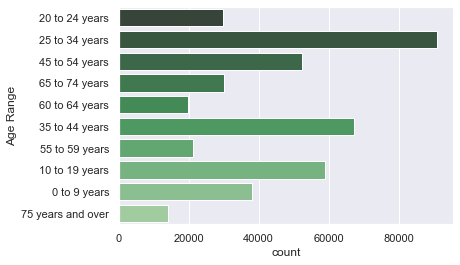

In [14]:
#Visualisierung der Altersgruppen allgemein
sns.countplot(y='Age Range',
               data=df,
               palette="Greens_d"
)

In [40]:
#Saubermachen müssten man, wenn man das möchte, ganz am Anfang, bevor man startet
# --> müsste ich einbauen, wenn ich das unbedingt will!!!
df = pd.read_csv("../data/Library_Usage.csv", na_values="None")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,NaN,NaN,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016.0,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,NaN,NaN,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,NaN,NaN,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016.0,z,email,True,2003,False,2.0


In [41]:
df.isna().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month         67904
Circulation Active Year          67904
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

In [18]:
#neue Variable bilden is child
df['is child'] = df['Age Range'].isin(['0 to 9 years', '10 to 19 years'])
df['is child']

0         False
1         False
2         False
3         False
4         False
          ...  
423443     True
423444    False
423445     True
423446     True
423447     True
Name: is child, Length: 423448, dtype: bool

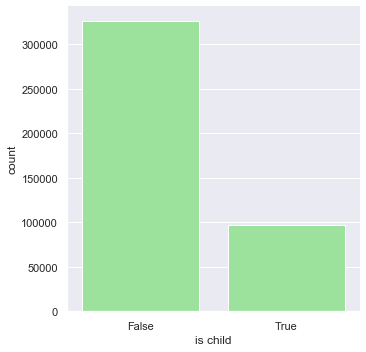

In [24]:
sns.catplot(x='is child',
            data=df, kind='count', color="lightgreen")

In [39]:
#Frage 3: Wie viele Nutzer lassen sich per Mail informieren? Wie viele per Post? 
#--> erstmal schauen, was es überhaupt alles gibt + Anzahl
df['Notice Preference Definition'].value_counts()

email    323937
phone     68172
print     31336
none          3
Name: Notice Preference Definition, dtype: int64

In [54]:
#Ausgabe nur Info per Mail
print(len(df[df['Notice Preference Definition'] == 'email']))

323937


In [55]:
#Ausgabe nur Info per Post
print(len(df[df['Notice Preference Definition'] == 'print']))

31336


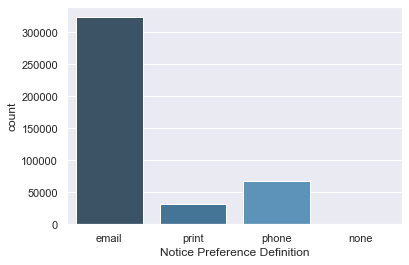

In [61]:
#Visualiserung der Benachrichtigungsform
sns.countplot(x='Notice Preference Definition',
               data=df,
               palette="Blues_d"
)

In [35]:
#Frage 4: Welche Benutzergruppe nutzt am häufigsten die Benachrichtigungsoption E-Mail?
pd.crosstab(
    df['Notice Preference Definition'],
    df['Patron Type Definition'],
    margins=True
)

Patron Type Definition,ADULT,AT USER ADULT,AT USER JUVENILE,AT USER SENIOR,AT USER TEEN,AT USER WELCOME,BOOKS BY MAIL,DIGITAL ACCESS CARD,FRIENDS FOR LIFE,JUVENILE,RETIRED STAFF,SENIOR,SPECIAL,STAFF,TEACHER CARD,VISITOR,WELCOME,YOUNG ADULT,All
Notice Preference Definition,,,,,,,,,,,,,,,,,,,
email,223579,250,34,31,31,33,47,964,24,40263,123,25220,352,794,1647,360,11604,18581,323937
none,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3
phone,33425,63,7,26,4,5,25,173,11,12583,28,12072,292,33,97,32,1751,7545,68172
print,15246,36,6,9,9,7,23,607,5,6360,6,4327,333,35,38,23,1576,2690,31336
All,272251,349,47,66,44,45,95,1744,40,59208,157,41619,977,862,1782,415,14931,28816,423448


In [36]:
#Frage 4: prozentual betrachtet
pd.crosstab(
    df['Notice Preference Definition'],
    df['Patron Type Definition'],
    margins=True, normalize=1
)

Patron Type Definition,ADULT,AT USER ADULT,AT USER JUVENILE,AT USER SENIOR,AT USER TEEN,AT USER WELCOME,BOOKS BY MAIL,DIGITAL ACCESS CARD,FRIENDS FOR LIFE,JUVENILE,RETIRED STAFF,SENIOR,SPECIAL,STAFF,TEACHER CARD,VISITOR,WELCOME,YOUNG ADULT,All
Notice Preference Definition,,,,,,,,,,,,,,,,,,,
email,0.821224,0.716332,0.723404,0.469697,0.704545,0.733333,0.494737,0.552752,0.600,0.680026,0.783439,0.605973,0.360287,0.921114,0.924242,0.867470,0.777175,0.644815,0.764998
none,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007
phone,0.122773,0.180516,0.148936,0.393939,0.090909,0.111111,0.263158,0.099197,0.275,0.212522,0.178344,0.290060,0.298874,0.038283,0.054433,0.077108,0.117273,0.261834,0.160993
print,0.056000,0.103152,0.127660,0.136364,0.204545,0.155556,0.242105,0.348050,0.125,0.107418,0.038217,0.103967,0.340839,0.040603,0.021324,0.055422,0.105552,0.093351,0.074002


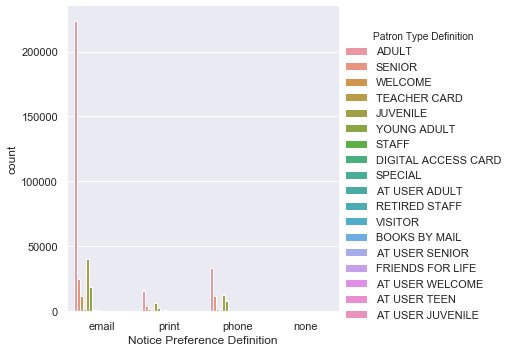

In [38]:
sns.catplot(x='Notice Preference Definition', hue='Patron Type Definition', 
            data=df, kind='count')

In [63]:
#Frage 5: Welche Altersgruppe verlängert im Mittel wie oft? + Streuung dazu ansehen
# Was muss ich mir dazu ansehen? --> mean

df['Total Renewals'].mean()

59.657327464056976

In [120]:
df.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year         float64
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
is age range summe              float64
is total renewals mean          float64
dtype: object

In [74]:
#Kreuztabelle zur Anzeige beider Werte macht Count --> Mist
pd.crosstab(
    [df['Total Renewals'].mean()],
    df['Age Range']
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
row_0,,,,,,,,,,
59.657327,38242,58944,29761,91083,67390,52492,21230,19800,30141,14150


In [121]:
column_names = ['Total Renewals', 'Age Range']
subset = df[column_names]
print(subset)

        Total Renewals       Age Range
0                    0  20 to 24 years
1                   22  25 to 34 years
2                    0  45 to 54 years
3                    0  25 to 34 years
4                   11  45 to 54 years
...                ...             ...
423443              13  10 to 19 years
423444              11  60 to 64 years
423445              58    0 to 9 years
423446               0  10 to 19 years
423447               0    0 to 9 years

[423448 rows x 2 columns]


In [123]:
ar = df['Age Range'].value_counts(), 'Total Renewals'
print(ar)

(25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64, 'Total Renewals')


In [94]:
trm = df['Total Renewals'].mean()
print(trm)

59.657327464056976


In [116]:
filter_totalrenew_age = (df['Age Range'] == '0 to 9 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,is age range summe,is total renewals mean
287,1,JUVENILE,0,0,0 to 9 years,M6,Mission,NaN,NaN,p,phone,False,2014,False,6.0,NaN,59.657327
289,1,JUVENILE,20,0,0 to 9 years,E9,Excelsior,July,2016.0,z,email,True,2016,False,11.0,NaN,59.657327
291,1,JUVENILE,53,31,0 to 9 years,A5,Anza,June,2013.0,z,email,True,2012,False,1.0,NaN,59.657327
292,1,JUVENILE,1,0,0 to 9 years,O7,Ortega,June,2014.0,z,email,True,2014,False,5.0,NaN,59.657327
295,1,JUVENILE,0,0,0 to 9 years,A5,Anza,NaN,NaN,z,email,True,2016,False,8.0,NaN,59.657327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423434,1,JUVENILE,10,0,0 to 9 years,V3,Visitacion Valley,September,2015.0,p,phone,False,2012,False,10.0,NaN,59.657327
423437,1,JUVENILE,0,0,0 to 9 years,W4,Western Addition,NaN,NaN,z,email,True,2015,False,5.0,NaN,59.657327
423439,1,JUVENILE,0,0,0 to 9 years,N4,Noe Valley/Sally Brunn,NaN,NaN,z,email,True,2015,False,8.0,NaN,59.657327
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016.0,z,email,True,2014,False,9.0,NaN,59.657327


In [126]:
df_filterage0to9 = df.loc[filter_totalrenew_age]

In [130]:
df_filterage0to9

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,is age range summe,is total renewals mean
287,1,JUVENILE,0,0,0 to 9 years,M6,Mission,NaN,NaN,p,phone,False,2014,False,6.0,NaN,59.657327
289,1,JUVENILE,20,0,0 to 9 years,E9,Excelsior,July,2016.0,z,email,True,2016,False,11.0,NaN,59.657327
291,1,JUVENILE,53,31,0 to 9 years,A5,Anza,June,2013.0,z,email,True,2012,False,1.0,NaN,59.657327
292,1,JUVENILE,1,0,0 to 9 years,O7,Ortega,June,2014.0,z,email,True,2014,False,5.0,NaN,59.657327
295,1,JUVENILE,0,0,0 to 9 years,A5,Anza,NaN,NaN,z,email,True,2016,False,8.0,NaN,59.657327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423434,1,JUVENILE,10,0,0 to 9 years,V3,Visitacion Valley,September,2015.0,p,phone,False,2012,False,10.0,NaN,59.657327
423437,1,JUVENILE,0,0,0 to 9 years,W4,Western Addition,NaN,NaN,z,email,True,2015,False,5.0,NaN,59.657327
423439,1,JUVENILE,0,0,0 to 9 years,N4,Noe Valley/Sally Brunn,NaN,NaN,z,email,True,2015,False,8.0,NaN,59.657327
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016.0,z,email,True,2014,False,9.0,NaN,59.657327


In [131]:
#Und das ist die mittlere Verlängerungsrate für die Altergruppe 0-9
df_filterage0to9['Total Renewals'].mean()

43.98062339835783

In [132]:
filter_totalrenew_age_1 = (df['Age Range'] == '10 to 19 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_1]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,is age range summe,is total renewals mean
283,1,JUVENILE,67,1,10 to 19 years,R3,Richmond,June,2014.0,p,phone,True,2010,False,5.0,NaN,59.657327
288,0,ADULT,0,0,10 to 19 years,X,Main Library,NaN,NaN,z,email,True,2012,True,NaN,NaN,59.657327
290,0,ADULT,0,0,10 to 19 years,M4,Merced,NaN,NaN,z,email,True,2011,False,4.0,NaN,59.657327
297,2,YOUNG ADULT,802,42,10 to 19 years,O7,Ortega,April,2016.0,p,phone,True,2003,False,NaN,NaN,59.657327
304,0,ADULT,0,0,10 to 19 years,O7,Ortega,NaN,NaN,z,email,True,2016,False,4.0,NaN,59.657327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423438,0,ADULT,0,0,10 to 19 years,W4,Western Addition,NaN,NaN,z,email,True,2015,True,NaN,NaN,59.657327
423440,2,YOUNG ADULT,42,53,10 to 19 years,M4,Merced,June,2014.0,p,phone,False,2011,True,NaN,NaN,59.657327
423442,2,YOUNG ADULT,608,364,10 to 19 years,S7,Sunset,July,2016.0,z,email,True,2003,False,7.0,NaN,59.657327
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015.0,p,phone,False,2009,False,9.0,NaN,59.657327


In [134]:
#Und das ist die mittlere Verlängerungsrate für die Altergruppe 10-19 Jahre
df_filterage10to19 = df.loc[filter_totalrenew_age_1]
df_filterage10to19['Total Renewals'].mean()

53.083825325732896

In [137]:
df['Age Range'].value_counts()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [140]:
#Das Ganze mal ein bisschen abkürzen? Geht das?
filter_totalrenew_age_2 = (df['Age Range'] == '20 to 24 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_2]
df_filterage20to24 = df.loc[filter_totalrenew_age_2]
filter_totalrenew_age_3 = (df['Age Range'] == '25 to 34 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_3]
df_filterage25to34 = df.loc[filter_totalrenew_age_3]
filter_totalrenew_age_4 = (df['Age Range'] == '35 to 44 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_4]
df_filterage35to44 = df.loc[filter_totalrenew_age_4]
filter_totalrenew_age_5 = (df['Age Range'] == '45 to 54 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_5]
df_filterage45to54 = df.loc[filter_totalrenew_age_5]
filter_totalrenew_age_6 = (df['Age Range'] == '55 to 59 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_6]
df_filterage55to59 = df.loc[filter_totalrenew_age_6]
filter_totalrenew_age_7 = (df['Age Range'] == '60 to 64 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_7]
df_filterage60to64 = df.loc[filter_totalrenew_age_7]
filter_totalrenew_age_8 = (df['Age Range'] == '65 to 74 years') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_8]
df_filterage65to74 = df.loc[filter_totalrenew_age_8]
filter_totalrenew_age_9 = (df['Age Range'] == '75 years and older') & (df['Total Renewals'] >= 0)
df.loc[filter_totalrenew_age_9]
df_filterage75older = df.loc[filter_totalrenew_age_9]

In [142]:
df_filterage0to9['Total Renewals'].mean()

43.98062339835783

In [143]:
df_filterage10to19['Total Renewals'].mean()

53.083825325732896

In [144]:
df_filterage20to24['Total Renewals'].mean()

35.57004132925641

In [145]:
df_filterage25to34['Total Renewals'].mean()

28.68843801807143

In [146]:
df_filterage35to44['Total Renewals'].mean()

58.727823119157144

In [147]:
df_filterage45to54['Total Renewals'].mean()

85.79821687114227

In [148]:
df_filterage55to59['Total Renewals'].mean()

99.9107395195478

In [149]:
df_filterage60to64['Total Renewals'].mean()

104.08621212121213

In [150]:
df_filterage65to74['Total Renewals'].mean()

100.38794333300156

In [153]:
df_filterage75older['Total Renewals'].mean()

nan

In [154]:
df_filterage75older

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,is age range summe,is total renewals mean


In [ ]:
#Antwort auf Frage 5 - Teilfrage: Altergruppe 60 bis 64 verlängert im Mittel die meisten Bücher.

In [155]:
#Frage 5 Ist die Streuung zwischen den Gruppen gleich? --> Varianzkoeffizient für jede Altersgruppe berechnen
df_filterage0to9['Total Renewals'].std()/df_filterage0to9['Total Checkouts'].mean()

1.33479042692986

In [156]:
df_filterage10to19['Total Renewals'].std()/df_filterage10to19['Total Checkouts'].mean()

0.7420003358799706

In [157]:
df_filterage20to24['Total Renewals'].std()/df_filterage20to24['Total Checkouts'].mean()

1.2093377282089017

In [158]:
df_filterage25to34['Total Renewals'].std()/df_filterage25to34['Total Checkouts'].mean()

2.4366416747071558

In [159]:
df_filterage35to44['Total Renewals'].std()/df_filterage35to44['Total Checkouts'].mean()

1.8291690466825523

In [160]:
df_filterage45to54['Total Renewals'].std()/df_filterage45to54['Total Checkouts'].mean()

1.473982785783054

In [161]:
df_filterage55to59['Total Renewals'].std()/df_filterage55to59['Total Checkouts'].mean()

1.3861878174457254

In [162]:
df_filterage60to64['Total Renewals'].std()/df_filterage60to64['Total Checkouts'].mean()

1.2400686475044658

In [163]:
df_filterage65to74['Total Renewals'].std()/df_filterage65to74['Total Checkouts'].mean()

1.1647743669576525

In [164]:
df_filterage75older['Total Renewals'].std()/df_filterage75older['Total Checkouts'].mean()

nan

In [ ]:
#Antwort Teilfrage 5 - Streuung: Streuung bei allen Altersgruppen unterschiedlich.

In [ ]:
#Grundsätzliche Fragen für den Präsenztag
#Wie kriegt man Kreuztabellen gut visualisiert?
#Wie hätte ich Frage 5 abkürzen können?
#Noch ein paar mehr praktische Visualisierungen zeigen, wäre super.